# Case Study 2 Data Clean Up 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer

In [14]:
'''#import data:
df_db_recat = pd.read_csv(r"C:\Paritosh\SMU\7333 Quantifying the World\Proj\CS2\diabetic_data_recategorized.csv")
df_id = pd.read_csv(r"C:\Paritosh\SMU\7333 Quantifying the World\Proj\CS2\IDs_mapping.csv")'''

'#import data:\ndf_db_recat = pd.read_csv(r"C:\\Paritosh\\SMUǛ3 Quantifying the World\\Proj\\CS2\\diabetic_data_recategorized.csv")\ndf_id = pd.read_csv(r"C:\\Paritosh\\SMUǛ3 Quantifying the World\\Proj\\CS2\\IDs_mapping.csv")'

In [15]:
#import data:
df_db_recat = pd.read_csv(r"C:\Users\allep\QTW_Projects\QTW-SPRING-2022\diabetic_data_recategorized.csv")
df_id = pd.read_csv(r"C:\Users\allep\QTW_Projects\QTW-SPRING-2022\dataset_diabetes\IDs_mapping.csv")

In [16]:
#view the head of the dataframe
df_db_recat.head()

,Unnamed: 0,race,gender,age,admission_type_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,metformin-pioglitazone,change,diabetesMed,readmitted,disharge_disposition_new_mapping,admission_source_new_mapping,diag_1_categorized,diag_2_categorized,diag_3_categorized,total_diag
0,0,Caucasian,Female,[0-10),6,1,NaN,Pediatrics-Endocrinology,41,0,...,No,No,No,NO,NaN,referral,C,NaN,NaN,1
1,1,Caucasian,Female,[10-20),1,3,NaN,NaN,59,0,...,No,Ch,Yes,>30,discharged,emergency,C,C,C,3
2,2,AfricanAmerican,Female,[20-30),1,2,NaN,NaN,11,5,...,No,No,Yes,NO,discharged,emergency,K,C,R,3
3,3,Caucasian,Male,[30-40),1,2,NaN,NaN,44,1,...,No,Ch,Yes,NO,discharged,emergency,A,C,G,3
4,4,Caucasian,Male,[40-50),1,1,NaN,NaN,51,0,...,No,Ch,Yes,NO,discharged,emergency,B,B,C,3


In [17]:
df_db_recat.shape

(101766, 48)

In [18]:
#drop identification columns and columns with same value (examide and citoglipton)
df = df_db_recat.drop(['citoglipton'], axis = 1)

In [19]:
#replace values of targets
df['readmitted'] = df['readmitted'].replace(['>30'],0) # Study is focused on with in 30 days so can be in bucket of no readmission
df['readmitted'] = df['readmitted'].replace(['NO'],0) # no admission 
df['readmitted'] = df['readmitted'].replace(['<30'],1) # readmission in 30 days
# df['readmitted'].head(20)
# df.groupby('readmitted').count()

In [20]:
# identify missing value chage ? to nan
df = df.replace('?', np.nan)
df.head()

,Unnamed: 0,race,gender,age,admission_type_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,metformin-pioglitazone,change,diabetesMed,readmitted,disharge_disposition_new_mapping,admission_source_new_mapping,diag_1_categorized,diag_2_categorized,diag_3_categorized,total_diag
0,0,Caucasian,Female,[0-10),6,1,NaN,Pediatrics-Endocrinology,41,0,...,No,No,No,0,NaN,referral,C,NaN,NaN,1
1,1,Caucasian,Female,[10-20),1,3,NaN,NaN,59,0,...,No,Ch,Yes,0,discharged,emergency,C,C,C,3
2,2,AfricanAmerican,Female,[20-30),1,2,NaN,NaN,11,5,...,No,No,Yes,0,discharged,emergency,K,C,R,3
3,3,Caucasian,Male,[30-40),1,2,NaN,NaN,44,1,...,No,Ch,Yes,0,discharged,emergency,A,C,G,3
4,4,Caucasian,Male,[40-50),1,1,NaN,NaN,51,0,...,No,Ch,Yes,0,discharged,emergency,B,B,C,3


<AxesSubplot:>

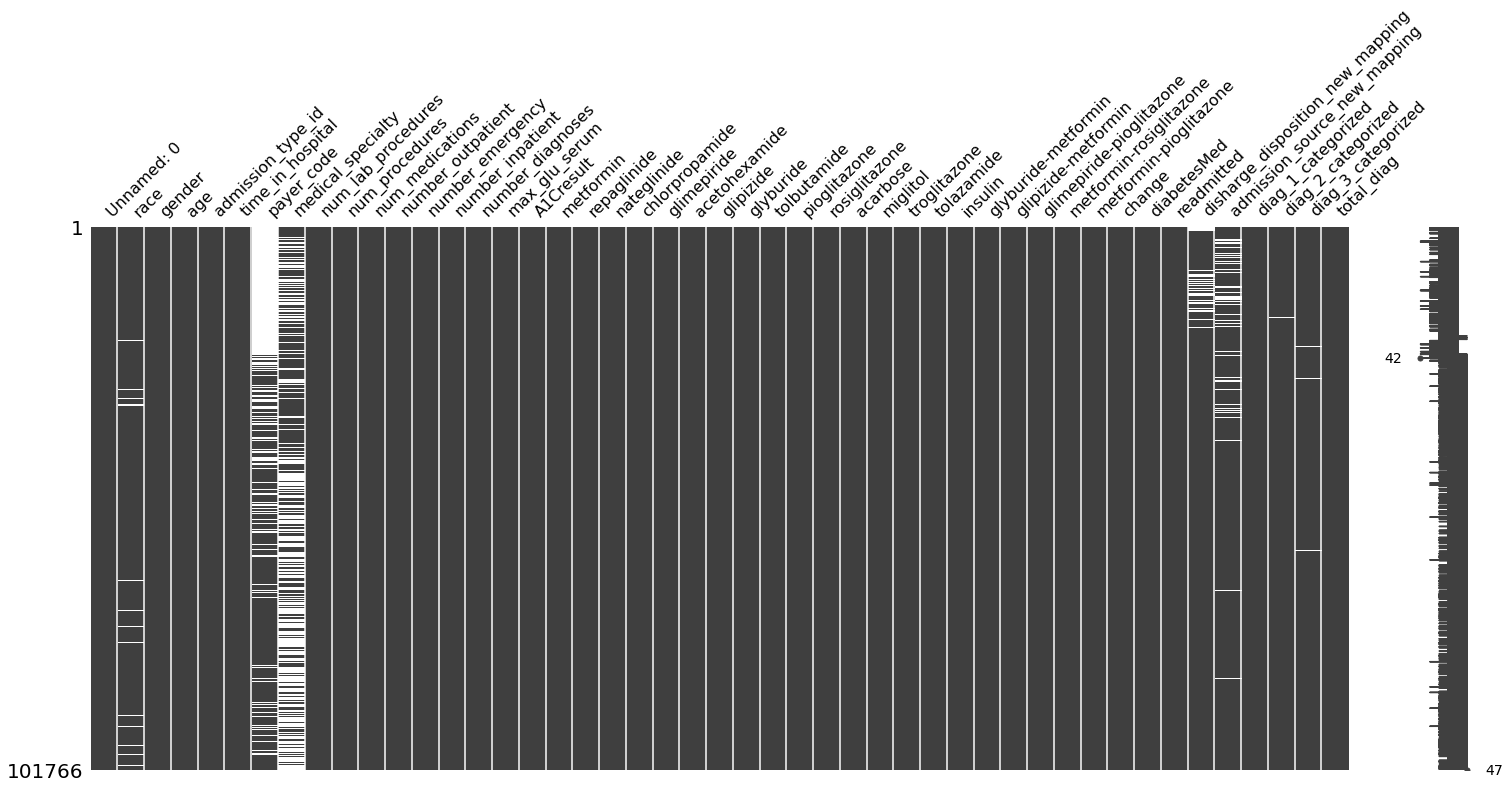

In [21]:
#The bar matrix below represents the entire data frame and the white spaces show where data is missing.
msno.matrix(df)

<AxesSubplot:>

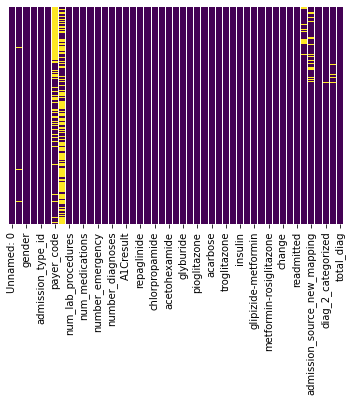

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='readmitted', ylabel='count'>

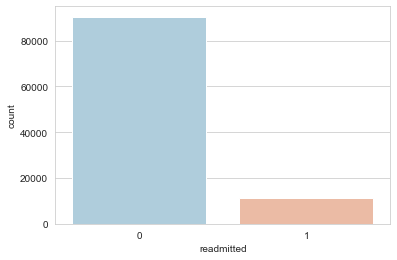

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='readmitted',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='readmitted', ylabel='count'>

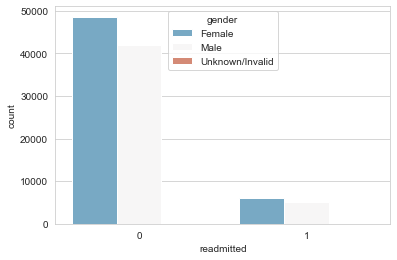

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='readmitted',hue='gender',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='readmitted', ylabel='count'>

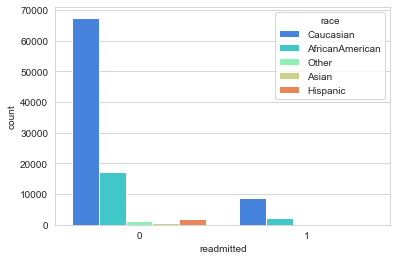

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='readmitted',hue='race',data=df,palette='rainbow')

In [26]:
#find missing value
df.isna().sum()

Unnamed: 0                              0
race                                 2273
gender                                  0
age                                     0
admission_type_id                       0
time_in_hospital                        0
payer_code                          40256
medical_specialty                   49949
num_lab_procedures                      0
num_procedures                          0
num_medications                         0
number_outpatient                       0
number_emergency                        0
number_inpatient                        0
number_diagnoses                        0
max_glu_serum                           0
A1Cresult                               0
metformin                               0
repaglinide                             0
nateglinide                             0
chlorpropamide                          0
glimepiride                             0
acetohexamide                           0
glipizide                         

<AxesSubplot:>

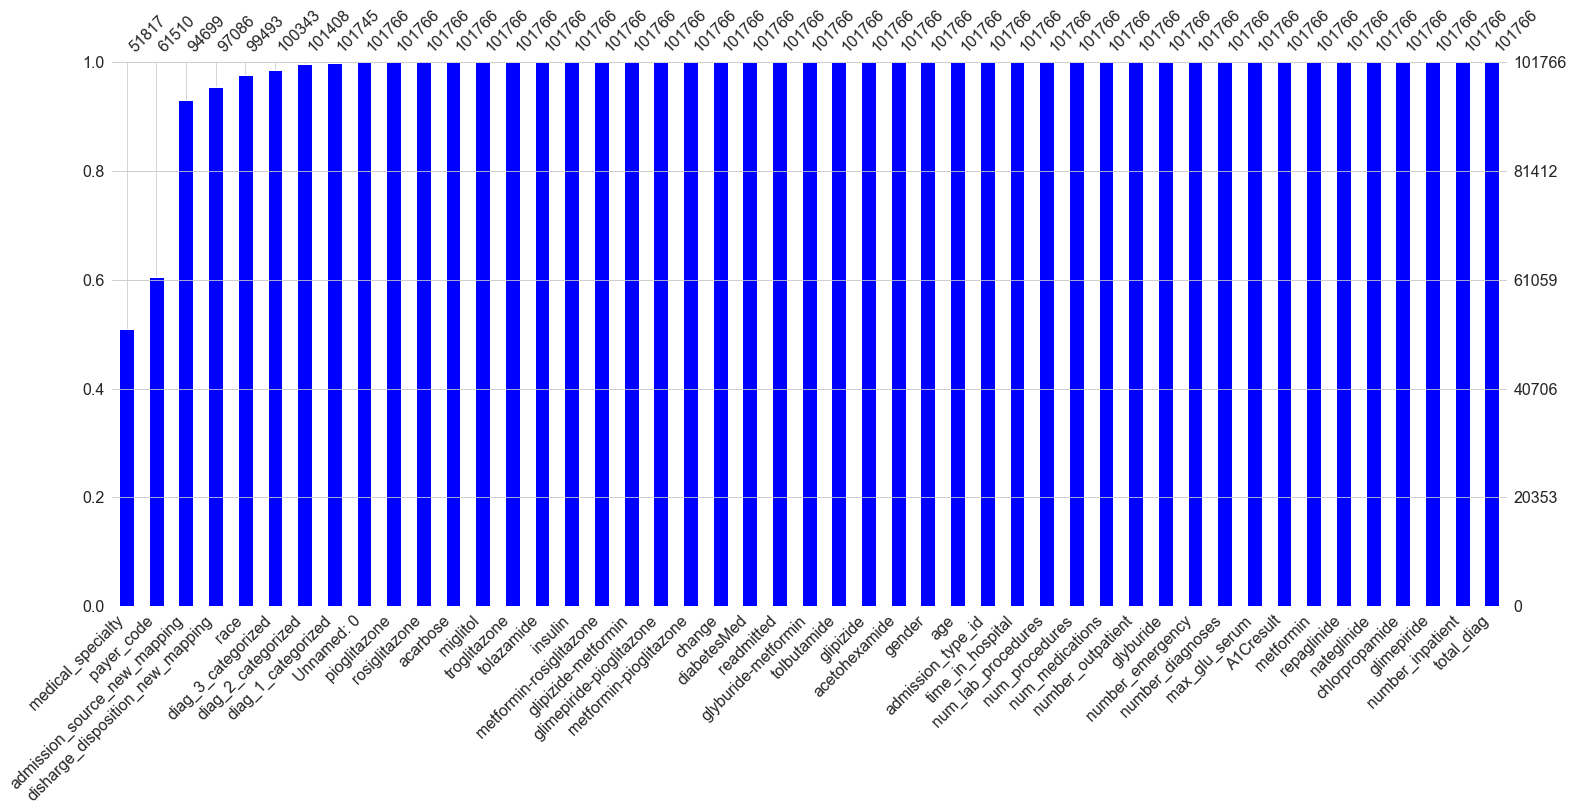

In [27]:
print("")
msno.bar(df, sort="ascending", color="blue")

In [28]:
#drop weight
#df1 = df.drop(['weight'], axis = 1)

In [71]:
#drop weight
df2 = df.drop(['readmitted','Unnamed: 0'], axis = 1)

In [72]:
# Column names of features coded as continuous

cont_summary = df2.describe()
cont_summary

,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,2.982293
std,1.445403,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.151382
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,3.000000
50%,1.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,3.000000
75%,3.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,3.000000
max,8.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,3.000000


# Prepare Test and Train Data

In [74]:
## X for explanatory variables and y for the response variable
y = df['readmitted']
X = df.drop(['readmitted','Unnamed: 0'], axis=1)
print('Size of target vector: ', y.shape)
print('='*50)
print('Size of explanatory matrix: ',X.shape)

Size of target vector:  (101766,)
Size of explanatory matrix:  (101766, 45)


In [75]:
## counting unique values of targets 
print("split between 0 and 1 of binary classes:  \n", '-----------------')
print(y.value_counts())
'''The data looks a bit unbalanced (89:11 split). So, we will use StratifiedKFold to create test and train data'''

split between 0 and 1 of binary classes:  
 -----------------
0    90409
1    11357
Name: readmitted, dtype: int64


'The data looks a bit unbalanced (89:11 split). So, we will use StratifiedKFold to create test and train data'

In [76]:
## Creating training and test data using StratifiedKFold
from sklearn.model_selection import StratifiedKFold, KFold

cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=21)

for train, test in cv.split(X,y):
    X_train = X.iloc[train] 
    X_test  = X.iloc[test] 
    y_train = y[train]
    y_test  = y[test] 

# Train Data Set

In [77]:
df_train=pd.DataFrame(X_train)

In [78]:
df_train.head()

,race,gender,age,admission_type_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,disharge_disposition_new_mapping,admission_source_new_mapping,diag_1_categorized,diag_2_categorized,diag_3_categorized,total_diag
0,Caucasian,Female,[0-10),6,1,NaN,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,NaN,referral,C,NaN,NaN,1
1,Caucasian,Female,[10-20),1,3,NaN,NaN,59,0,18,...,No,No,Ch,Yes,discharged,emergency,C,C,C,3
2,AfricanAmerican,Female,[20-30),1,2,NaN,NaN,11,5,13,...,No,No,No,Yes,discharged,emergency,K,C,R,3
3,Caucasian,Male,[30-40),1,2,NaN,NaN,44,1,16,...,No,No,Ch,Yes,discharged,emergency,A,C,G,3
4,Caucasian,Male,[40-50),1,1,NaN,NaN,51,0,8,...,No,No,Ch,Yes,discharged,emergency,B,B,C,3


In [79]:
df_test=pd.DataFrame(X_test)

In [80]:
df_test.head()

,race,gender,age,admission_type_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,disharge_disposition_new_mapping,admission_source_new_mapping,diag_1_categorized,diag_2_categorized,diag_3_categorized,total_diag
7,Caucasian,Male,[70-80),1,5,NaN,NaN,73,0,12,...,No,No,No,Yes,discharged,emergency,G,H,C,3
14,AfricanAmerican,Female,[60-70),3,1,NaN,NaN,49,5,2,...,No,No,No,Yes,discharged,referral,H,Q,J,3
32,Caucasian,Female,[70-80),1,6,NaN,Family/GeneralPractice,27,0,16,...,No,No,No,Yes,discharged,emergency,Q,Q,C,3
34,Caucasian,Female,[70-80),2,5,NaN,NaN,46,2,20,...,No,No,Ch,Yes,expired,referral,G,J,G,3
37,Caucasian,Female,[60-70),1,4,NaN,NaN,33,0,12,...,No,No,Ch,Yes,discharged,emergency,H,C,C,3


In [81]:
# Column names of features coded as continuous

cont_sum_train = df_train.describe()
cont_sum_train

,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
count,91590.000000,91590.000000,91590.000000,91590.000000,91590.000000,91590.000000,91590.000000,91590.000000,91590.000000,91590.000000
mean,2.022775,4.395010,43.115395,1.339808,16.018703,0.368195,0.197292,0.635277,7.422917,2.982356
std,1.445538,2.986019,19.661619,1.705306,8.127230,1.268101,0.905803,1.263490,1.932034,0.150753
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,3.000000
50%,1.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,3.000000
75%,3.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,3.000000
max,8.000000,14.000000,132.000000,6.000000,79.000000,42.000000,76.000000,21.000000,16.000000,3.000000


In [82]:
#Continous Variable Column
cont_var_train=cont_sum_train.columns
cont_var_train

Index(['admission_type_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'total_diag'],
      dtype='object')

In [83]:
#dataframe for Cont variable
df_cont_train=df_train[cont_var_train]
df_cont_train.head()

,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
0,6,1,41,0,1,0,0,0,1,1
1,1,3,59,0,18,0,0,0,9,3
2,1,2,11,5,13,2,0,1,6,3
3,1,2,44,1,16,0,0,0,7,3
4,1,1,51,0,8,0,0,0,5,3


In [109]:
cat_var_train = list(df_train.columns.drop(cont_var_train) )
np.array(cat_var_train)

array(['race', 'gender', 'age', 'payer_code', 'medical_specialty',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'disharge_disposition_new_mapping',
       'admission_source_new_mapping', 'diag_1_categorized',
       'diag_2_categorized', 'diag_3_categorized'], dtype='<U32')

In [85]:
#data_frame for Cat_variable
df_cat_train=df_train[cat_var_train]
df_cat_train.head()

,race,gender,age,payer_code,medical_specialty,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,disharge_disposition_new_mapping,admission_source_new_mapping,diag_1_categorized,diag_2_categorized,diag_3_categorized
0,Caucasian,Female,[0-10),NaN,Pediatrics-Endocrinology,None,None,No,No,No,...,No,No,No,No,No,NaN,referral,C,NaN,NaN
1,Caucasian,Female,[10-20),NaN,NaN,None,None,No,No,No,...,No,No,No,Ch,Yes,discharged,emergency,C,C,C
2,AfricanAmerican,Female,[20-30),NaN,NaN,None,None,No,No,No,...,No,No,No,No,Yes,discharged,emergency,K,C,R
3,Caucasian,Male,[30-40),NaN,NaN,None,None,No,No,No,...,No,No,No,Ch,Yes,discharged,emergency,A,C,G
4,Caucasian,Male,[40-50),NaN,NaN,None,None,No,No,No,...,No,No,No,Ch,Yes,discharged,emergency,B,B,C


In [86]:
#Find missing value in categorical variable
df_cat_train.isna().sum()
# no missing value in cont variable

race                                 2059
gender                                  0
age                                     0
payer_code                          36214
medical_specialty                   45002
max_glu_serum                           0
A1Cresult                               0
metformin                               0
repaglinide                             0
nateglinide                             0
chlorpropamide                          0
glimepiride                             0
acetohexamide                           0
glipizide                               0
glyburide                               0
tolbutamide                             0
pioglitazone                            0
rosiglitazone                           0
acarbose                                0
miglitol                                0
troglitazone                            0
tolazamide                              0
insulin                                 0
glyburide-metformin               

In [119]:
cat_variables_train = df_train[cat_var_train]
df3_train = pd.get_dummies(cat_variables_train, drop_first=True)
df3_train = pd.concat([ df3_train, df_train[cont_var_train] ], axis=1)
df3_train

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
0,0,1,0,0,0,0,0,0,0,0,...,6,1,41,0,1,0,0,0,1,1
1,0,1,0,0,0,0,1,0,0,0,...,1,3,59,0,18,0,0,0,9,3
2,0,0,0,0,0,0,0,1,0,0,...,1,2,11,5,13,2,0,1,6,3
3,0,1,0,0,1,0,0,0,1,0,...,1,2,44,1,16,0,0,0,7,3
4,0,1,0,0,1,0,0,0,0,1,...,1,1,51,0,8,0,0,0,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,0,0,0,0,0,0,0,0,0,0,...,1,6,45,1,25,3,1,2,9,3
101762,0,0,0,0,0,0,0,0,0,0,...,1,5,33,3,18,0,0,1,9,3
101763,0,1,0,0,1,0,0,0,0,0,...,1,1,53,0,9,1,0,0,13,3
101764,0,1,0,0,0,0,0,0,0,0,...,2,10,45,2,21,0,0,1,9,3


In [140]:
#scale the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df3_train)
df3s_train = pd.DataFrame(scaler.transform(df3_train), columns = df3_train.columns, index = df3_train.index)
df3s_train

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.714286,0.000000,0.305344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.153846,0.442748,0.000000,0.217949,0.000000,0.000000,0.000000,0.533333,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.076923,0.076336,0.833333,0.153846,0.047619,0.000000,0.047619,0.333333,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.076923,0.328244,0.166667,0.192308,0.000000,0.000000,0.000000,0.400000,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.381679,0.000000,0.089744,0.000000,0.000000,0.000000,0.266667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.384615,0.335878,0.166667,0.307692,0.071429,0.013158,0.095238,0.533333,1.0
101762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.307692,0.244275,0.500000,0.217949,0.000000,0.000000,0.047619,0.533333,1.0
101763,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.396947,0.000000,0.102564,0.023810,0.000000,0.000000,0.800000,1.0
101764,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.692308,0.335878,0.333333,0.256410,0.000000,0.000000,0.047619,0.533333,1.0


In [144]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(df3s_train)
df4_train = pd.DataFrame(imputer.transform(df3s_train),columns = df3s_train.columns, index = df3s_train.index)
df4_train

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.714286,0.000000,0.305344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.153846,0.442748,0.000000,0.217949,0.000000,0.000000,0.000000,0.533333,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.076923,0.076336,0.833333,0.153846,0.047619,0.000000,0.047619,0.333333,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.076923,0.328244,0.166667,0.192308,0.000000,0.000000,0.000000,0.400000,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.381679,0.000000,0.089744,0.000000,0.000000,0.000000,0.266667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.384615,0.335878,0.166667,0.307692,0.071429,0.013158,0.095238,0.533333,1.0
101762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.307692,0.244275,0.500000,0.217949,0.000000,0.000000,0.047619,0.533333,1.0
101763,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.396947,0.000000,0.102564,0.023810,0.000000,0.000000,0.800000,1.0
101764,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.692308,0.335878,0.333333,0.256410,0.000000,0.000000,0.047619,0.533333,1.0


In [122]:
df4_train.isna().values.any()

False

In [123]:
df4_train.shape

(91590, 228)

# Create Test Dataset

In [98]:
df_test=pd.DataFrame(X_test)

In [99]:
df_test.head()

,race,gender,age,admission_type_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,disharge_disposition_new_mapping,admission_source_new_mapping,diag_1_categorized,diag_2_categorized,diag_3_categorized,total_diag
7,Caucasian,Male,[70-80),1,5,NaN,NaN,73,0,12,...,No,No,No,Yes,discharged,emergency,G,H,C,3
14,AfricanAmerican,Female,[60-70),3,1,NaN,NaN,49,5,2,...,No,No,No,Yes,discharged,referral,H,Q,J,3
32,Caucasian,Female,[70-80),1,6,NaN,Family/GeneralPractice,27,0,16,...,No,No,No,Yes,discharged,emergency,Q,Q,C,3
34,Caucasian,Female,[70-80),2,5,NaN,NaN,46,2,20,...,No,No,Ch,Yes,expired,referral,G,J,G,3
37,Caucasian,Female,[60-70),1,4,NaN,NaN,33,0,12,...,No,No,Ch,Yes,discharged,emergency,H,C,C,3


In [100]:
# Column names of features coded as continuous

cont_sum_test = df_test.describe()
cont_sum_test

,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
count,10176.000000,10176.000000,10176.000000,10176.000000,10176.000000,10176.000000,10176.000000,10176.000000,10176.000000,10176.000000
mean,2.035083,4.404776,42.917846,1.339033,16.050118,0.379815,0.202732,0.638168,7.419811,2.981722
std,1.444212,2.977025,19.788770,1.710391,8.130934,1.259734,1.128534,1.257263,1.947734,0.156936
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000,3.000000
50%,1.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,3.000000
75%,3.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,3.000000
max,8.000000,14.000000,129.000000,6.000000,81.000000,40.000000,64.000000,16.000000,16.000000,3.000000


In [101]:
#Continous Variable Column
cont_var_test=cont_sum_test.columns
cont_var_test

Index(['admission_type_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'total_diag'],
      dtype='object')

In [102]:
#dataframe for Cont variable
df_cont_test=df_test[cont_var_test]
df_cont_test.head()

,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
7,1,5,73,0,12,0,0,0,8,3
14,3,1,49,5,2,0,0,0,8,3
32,1,6,27,0,16,0,0,0,8,3
34,2,5,46,2,20,0,0,0,9,3
37,1,4,33,0,12,0,0,0,3,3


In [110]:
cat_var_test = list(df_test.columns.drop(cont_var_test) )
np.array(cat_var_test)

array(['race', 'gender', 'age', 'payer_code', 'medical_specialty',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'disharge_disposition_new_mapping',
       'admission_source_new_mapping', 'diag_1_categorized',
       'diag_2_categorized', 'diag_3_categorized'], dtype='<U32')

In [60]:
#data_frame for Cat_variable
df_cat_test=df_test[cat_var_test]
df_cat_test.head()

,race,gender,age,payer_code,medical_specialty,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,disharge_disposition_new_mapping,admission_source_new_mapping,diag_1_categorized,diag_2_categorized,diag_3_categorized
7,Caucasian,Male,[70-80),NaN,NaN,None,None,No,No,No,...,No,No,No,No,Yes,discharged,emergency,G,H,C
14,AfricanAmerican,Female,[60-70),NaN,NaN,None,None,No,No,No,...,No,No,No,No,Yes,discharged,referral,H,Q,J
32,Caucasian,Female,[70-80),NaN,Family/GeneralPractice,None,None,No,No,No,...,No,No,No,No,Yes,discharged,emergency,Q,Q,C
34,Caucasian,Female,[70-80),NaN,NaN,None,None,No,No,No,...,No,No,No,Ch,Yes,expired,referral,G,J,G
37,Caucasian,Female,[60-70),NaN,NaN,None,None,Steady,No,No,...,No,No,No,Ch,Yes,discharged,emergency,H,C,C


In [61]:
#Find missing value in categorical variable
df_cat_test.isna().sum()


race                                 214
gender                                 0
age                                    0
payer_code                          4042
medical_specialty                   4947
max_glu_serum                          0
A1Cresult                              0
metformin                              0
repaglinide                            0
nateglinide                            0
chlorpropamide                         0
glimepiride                            0
acetohexamide                          0
glipizide                              0
glyburide                              0
tolbutamide                            0
pioglitazone                           0
rosiglitazone                          0
acarbose                               0
miglitol                               0
troglitazone                           0
tolazamide                             0
insulin                                0
glyburide-metformin                    0
glipizide-metfor

In [124]:
cat_variables_test =df_test[cat_var_test]
df3_test = pd.get_dummies(cat_variables_test, drop_first=True)
df3_test = pd.concat([ df3_test, df_test[cont_var_test] ], axis=1)
df3_test

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),...,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
7,0,1,0,0,1,0,0,0,0,0,...,1,5,73,0,12,0,0,0,8,3
14,0,0,0,0,0,0,0,0,0,0,...,3,1,49,5,2,0,0,0,8,3
32,0,1,0,0,0,0,0,0,0,0,...,1,6,27,0,16,0,0,0,8,3
34,0,1,0,0,0,0,0,0,0,0,...,2,5,46,2,20,0,0,0,9,3
37,0,1,0,0,0,0,0,0,0,0,...,1,4,33,0,12,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101702,0,0,0,0,1,0,0,0,0,0,...,1,5,57,0,19,2,1,2,9,3
101712,0,1,0,0,0,0,0,0,0,0,...,1,5,3,3,12,0,0,2,9,3
101723,0,1,0,0,1,0,0,0,0,0,...,3,3,41,1,13,0,0,0,7,3
101758,0,1,0,0,0,0,0,0,0,0,...,1,5,76,1,22,0,1,0,9,3


In [132]:
# Check the variable (column) count in train vs. test
print("# Train Variables =", df3s_train.shape[1])
print("# Test Variables =", df3s_test.shape[1])

# Train Variables = 228
# Test Variables = 197


In [133]:
# Variables not in both train & test
col_train = set(df3s_train.columns)
col_test = set(df3s_test.columns)
print( '# columns in train but not in test', len(col_train - col_test) )
print( '# columns in test but not in train', len(col_test - col_train) )

# columns in train but not in test 33
# columns in test but not in train 2


In [135]:
# Drop the variables in test but not in train
df4s_test = df3s_test.drop(col_test - col_train, axis=1)
df4s_test.shape

(10176, 195)

In [138]:
# Fill the variable columns not in the test set (col_fill) with zeros

# columns in train not in test
col_fill = list(col_train - col_test) 

# zero columns to attach to test data
zero_col = np.zeros( (df4s_test.shape[0], len(col_fill)), dtype=int)
zero_col = pd.DataFrame(zero_col).astype(str)
zero_col.index = df4s_test.index
zero_col.columns = col_fill
zero_col

,medical_specialty_Neurophysiology,medical_specialty_Perinatology,medical_specialty_Anesthesiology-Pediatric,medical_specialty_Speech,medical_specialty_Psychiatry-Addictive,medical_specialty_DCPTEAM,miglitol_Up,troglitazone_Steady,medical_specialty_Pediatrics-EmergencyMedicine,tolazamide_Up,...,glyburide-metformin_Up,medical_specialty_Pediatrics-AllergyandImmunology,medical_specialty_Cardiology,acetohexamide_Steady,metformin-pioglitazone_Steady,gender_Unknown/Invalid,payer_code_FR,admission_source_new_mapping_normal-delivery,medical_specialty_SportsMedicine,medical_specialty_Pediatrics-Hematology-Oncology
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
# concatenate columns
df4s_test = pd.concat([df4s_test, zero_col], axis=1)
print( "df4s_test matches the # of columns for df3s_train for predict:", df4s_test.shape[1] == df3s_train.shape[1] )

df4s_test matches the # of columns for df3s_train for predict: True


In [142]:
# Match the column order for train and test
col_order = df3s_train.columns
df4s_test = df4s_test[col_order]

### scale the test data with the scaler fit to the train data

In [143]:
#scale the test data
df3s_test = pd.DataFrame(scaler.transform(df4s_test), columns = df4s_test.columns, index = df4s_test.index)
df3s_test

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.142857,-0.053254,-0.003340,0.000000,-0.011058,0.00000,0.000000,0.000000,-0.035556,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.102041,-0.076923,-0.004771,0.138889,-0.012660,0.00000,0.000000,0.000000,-0.035556,0.0
32,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.142857,-0.047337,-0.006083,0.000000,-0.010417,0.00000,0.000000,0.000000,-0.035556,0.0
34,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.122449,-0.053254,-0.004950,0.055556,-0.009776,0.00000,0.000000,0.000000,-0.031111,0.0
37,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.142857,-0.059172,-0.005725,0.000000,-0.011058,0.00000,0.000000,0.000000,-0.057778,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101702,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.142857,-0.053254,-0.004294,0.000000,-0.009936,0.00119,0.000206,0.005952,-0.031111,0.0
101712,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.142857,-0.053254,-0.007514,0.083333,-0.011058,0.00000,0.000000,0.005952,-0.031111,0.0
101723,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.102041,-0.065089,-0.005248,0.027778,-0.010897,0.00000,0.000000,0.000000,-0.040000,0.0
101758,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.142857,-0.053254,-0.003161,0.027778,-0.009455,0.00000,0.000206,0.000000,-0.031111,0.0


### Impute the test data with the imputer fit to the train data

In [145]:
df4_test = pd.DataFrame(imputer.transform(df4s_test), columns = df4s_test.columns, index = df4s_test.index)
df4_test

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),age_[40-50),...,admission_type_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,total_diag
7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.307692,0.562500,0.000000,0.1375,0.00,0.000000,0.000,0.466667,1.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285714,0.000000,0.375000,0.833333,0.0125,0.00,0.000000,0.000,0.466667,1.0
32,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.384615,0.203125,0.000000,0.1875,0.00,0.000000,0.000,0.466667,1.0
34,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.307692,0.351562,0.333333,0.2375,0.00,0.000000,0.000,0.533333,1.0
37,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.230769,0.250000,0.000000,0.1375,0.00,0.000000,0.000,0.133333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101702,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.307692,0.437500,0.000000,0.2250,0.05,0.015625,0.125,0.533333,1.0
101712,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.307692,0.015625,0.500000,0.1375,0.00,0.000000,0.125,0.533333,1.0
101723,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.285714,0.153846,0.312500,0.166667,0.1500,0.00,0.000000,0.000,0.400000,1.0
101758,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.307692,0.585938,0.166667,0.2625,0.00,0.015625,0.000,0.533333,1.0


In [146]:
df4_test.isna().values.any()

False

In [147]:
df4_test.shape

(10176, 228)